# In this challenge, we will simulate IoT data streams to design a data collection strategy for a local environment.


---



#Step 1: Simulate IoT Data Streams in Google Colab


---


**Objective**: Create simulated IoT data to represent environmental conditions.

**Outcome**: A DataFrame containing simulated IoT data.

**Explanation**: Simulating IoT data allows us to create a realistic dataset representing various environmental conditions. This data will be used to understand patterns and anomalies in the local environment.

In [ ]:
import numpy as np
import pandas as pd

# Simulate IoT data
np.random.seed(42)
timestamps = pd.date_range(start='2022-01-01', periods=1000, freq='H')
temperature = np.random.normal(loc=20, scale=5, size=len(timestamps))
humidity = np.random.normal(loc=50, scale=10, size=len(timestamps))
co2_levels = np.random.normal(loc=400, scale=50, size=len(timestamps))

# Create a DataFrame
iot_data = pd.DataFrame({
    'timestamp': timestamps,
    'temperature': temperature,
    'humidity': humidity,
    'co2_levels': co2_levels
})

# Display the first few rows
iot_data.head()


timestamp  temperature   humidity  co2_levels
0 2022-01-01 00:00:00    22.483571  63.993554  366.241086
1 2022-01-01 01:00:00    19.308678  59.246337  392.774066
2 2022-01-01 02:00:00    23.238443  50.596304  360.379004
3 2022-01-01 03:00:00    27.615149  43.530632  384.601924
4 2022-01-01 04:00:00    18.829233  56.982233  305.319267

#Visualization 1: Plot the Raw IoT Data to Visualize Initial Data Patterns


---


**Objective**: Visualize the simulated IoT data to understand its initial patterns.

**Outcome**: Line plots showing temperature, humidity, and CO2 levels over time.

**Explanation**: Visualizing the raw IoT data helps to identify initial patterns and trends in the environmental conditions, which is crucial for further analysis and processing.

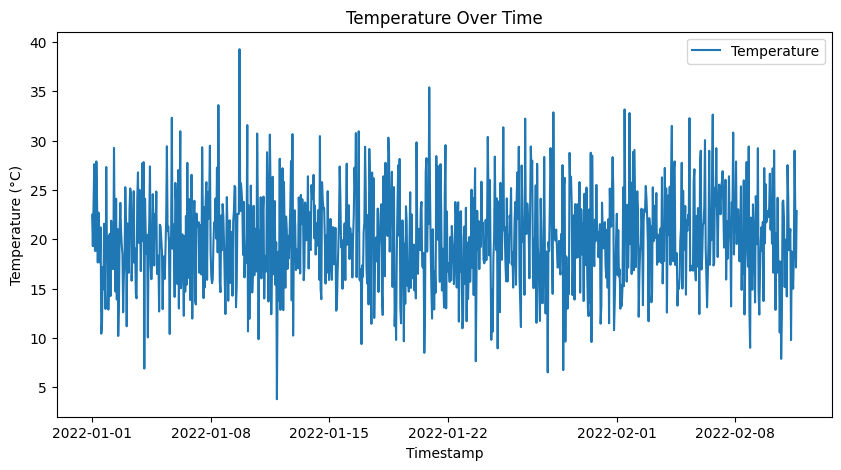

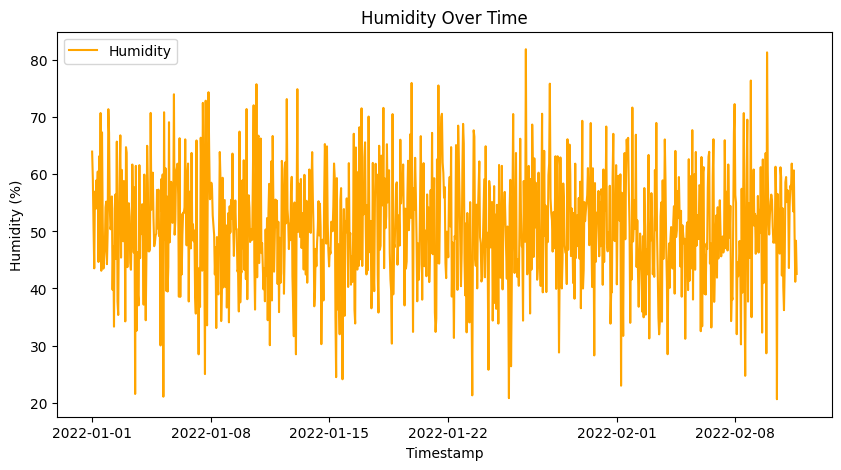

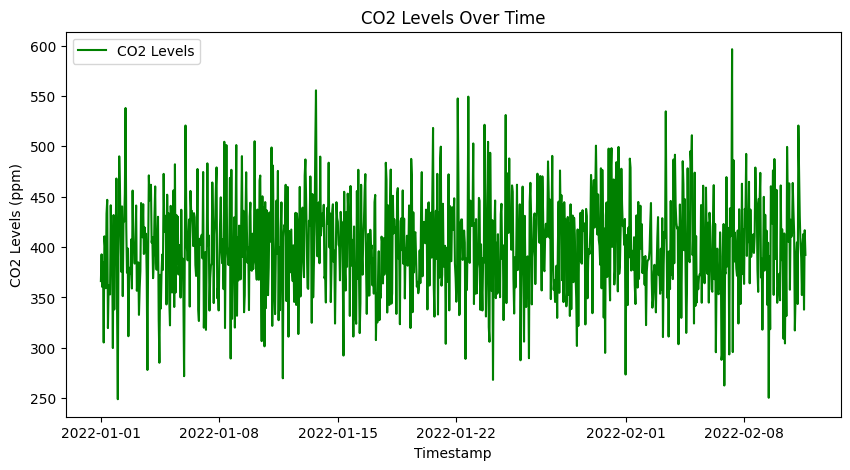

In [ ]:
import matplotlib.pyplot as plt

# Plot temperature over time
plt.figure(figsize=(10, 5))
plt.plot(iot_data['timestamp'], iot_data['temperature'], label='Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

# Plot humidity over time
plt.figure(figsize=(10, 5))
plt.plot(iot_data['timestamp'], iot_data['humidity'], label='Humidity', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.legend()
plt.show()

# Plot CO2 levels over time
plt.figure(figsize=(10, 5))
plt.plot(iot_data['timestamp'], iot_data['co2_levels'], label='CO2 Levels', color='green')
plt.xlabel('Timestamp')
plt.ylabel('CO2 Levels (ppm)')
plt.title('CO2 Levels Over Time')
plt.legend()
plt.show()


# Step 2: Process and Store the Data Using Python Libraries


---


**Objective**: Clean and process the IoT data to make it suitable for analysis.

**Outcome**: A cleaned and processed dataset ready for analysis.

**Explanation**: Data cleaning and processing are essential steps to ensure the quality and accuracy of the dataset. This involves handling missing values, removing outliers, and normalizing the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(iot_data.isnull().sum())

# Handle missing values if any (for example, filling with the mean value)
iot_data.fillna(iot_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
iot_data[['temperature', 'humidity', 'co2_levels']] = scaler.fit_transform(iot_data[['temperature', 'humidity', 'co2_levels']])

# Display the first few rows of the cleaned data
iot_data.head()


timestamp      0
temperature    0
humidity       0
co2_levels     0
dtype: int64


timestamp  temperature  humidity  co2_levels
0 2022-01-01 00:00:00     0.487759  1.332576   -0.692816
1 2022-01-01 01:00:00    -0.161022  0.856405   -0.152959
2 2022-01-01 02:00:00     0.642015 -0.011240   -0.812090
3 2022-01-01 03:00:00     1.536382 -0.719965   -0.319235
4 2022-01-01 04:00:00    -0.258995  0.629303   -1.932372

#Visualization 2: Visualize Cleaned and Processed Data to Identify Patterns or Anomalies


---


**Objective**: Visualize the cleaned IoT data to identify patterns or anomalies.

**Outcome**: Line plots showing the standardized environmental data over time.

**Explanation**: Visualizing the cleaned data helps in identifying significant patterns or anomalies that may not be visible in the raw data.

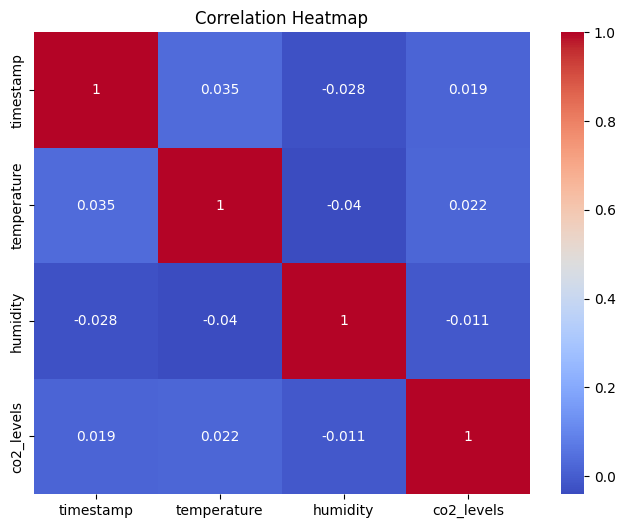

In [ ]:
import seaborn as sns

# Create a heatmap to show the correlation between different features
plt.figure(figsize=(8, 6))
sns.heatmap(iot_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Visualization 3: Box Plot to Identify Outliers in the Data


---


**Objective**: Identify the distribution and potential outliers in the cleaned data.

**Outcome**: Box plots for temperature, humidity, and CO2 levels.

**Explanation**: Box plots help in visualizing the spread of the data and identifying any outliers that may exist.

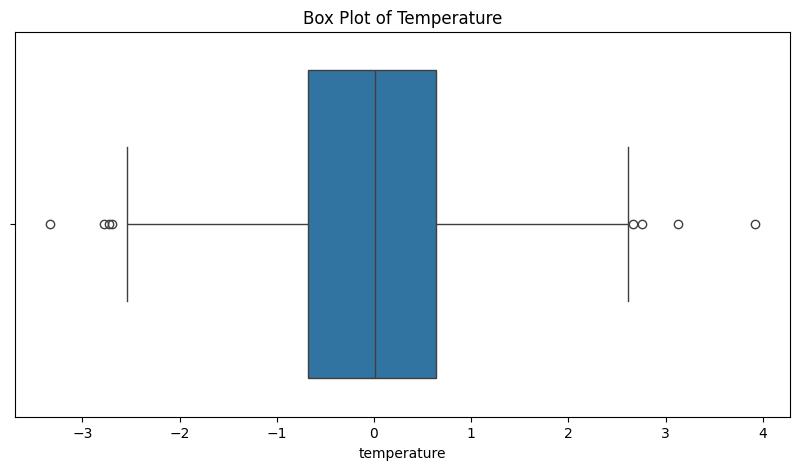

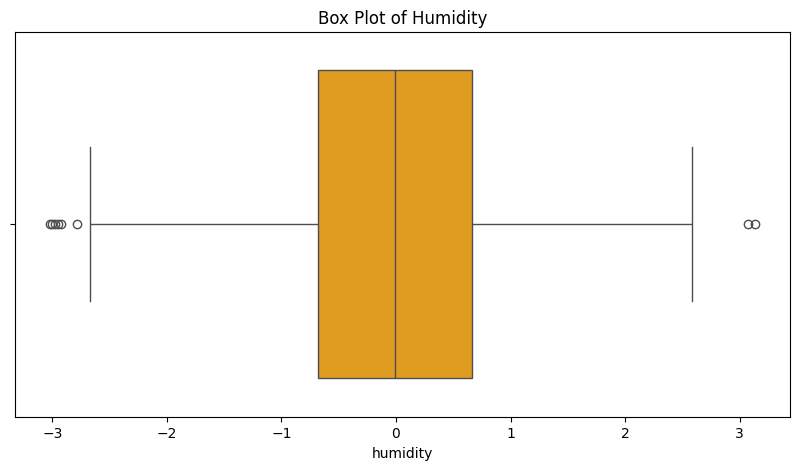

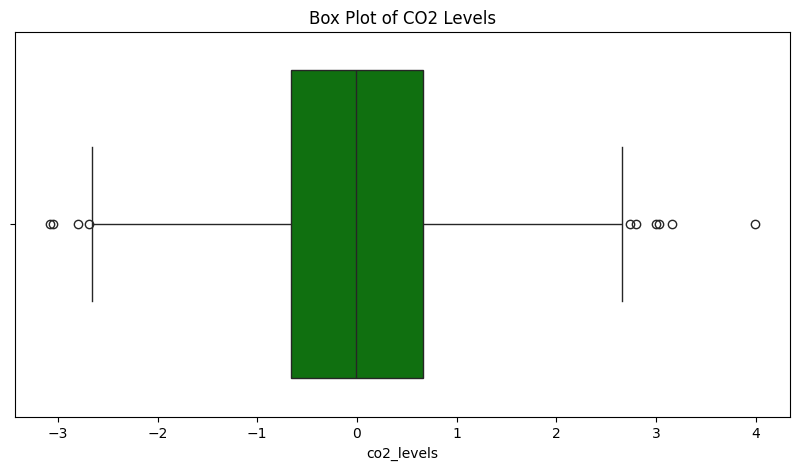

In [ ]:
# Box plot for temperature
plt.figure(figsize=(10, 5))
sns.boxplot(x=iot_data['temperature'])
plt.title('Box Plot of Temperature')
plt.show()

# Box plot for humidity
plt.figure(figsize=(10, 5))
sns.boxplot(x=iot_data['humidity'], color='orange')
plt.title('Box Plot of Humidity')
plt.show()

# Box plot for CO2 levels
plt.figure(figsize=(10, 5))
sns.boxplot(x=iot_data['co2_levels'], color='green')
plt.title('Box Plot of CO2 Levels')
plt.show()


#Step 3: Save the Processed Data for Later Use
**Objective**: Save the cleaned and processed data for future analysis and integration into the final project.

**Outcome**: A CSV file containing the processed IoT data.

**Explanation**: Saving the processed data ensures that it can be easily accessed and used in subsequent tasks and projects.

In [ ]:
# Save the cleaned and processed data to a CSV file
iot_data.to_csv('processed_iot_data.csv', index=False)
